In [33]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from top2vec import Top2Vec
import tensorflow_hub as hub
import os
import shutil

# Delete the existing tfhub_modules directory
# shutil.rmtree('/var/folders/r9/1bkv53y17nx4nlgj5txfvv800000gn/T/tfhub_modules/063d866c06683311b44b4992fd46003be952409c')

# Load the model again
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)


In [34]:
df = pd.read_csv('speeches.csv')

In [35]:
# data type of the column called "transcript"
df['transcript'] = df['transcript'].astype(str)

In [36]:
df['doc_name'].duplicated().sum()

0

In [37]:
docs = df['transcript'].astype(str).tolist()

In [38]:
top2vec_model = Top2Vec(documents=docs, embedding_model=model, speed='deep learn', workers=os.cpu_count())

2024-06-12 17:18:22,509 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-06-12 17:18:22,759 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-06-12 17:18:23,544 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-06-12 17:18:24,587 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-06-12 17:18:24,597 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [43]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()

print(f"Number of topics: {len(topic_sizes)}")
print(f"Topics: {topic_sizes}")
print(f"Topic numbers: {topic_nums}")


Number of topics: 2
Topics: [26 22]
Topic numbers: [0 1]


In [44]:
topic_words, word_scores, topic_nums = top2vec_model.get_topics()

print(f"Topic words: {topic_words}")
print(f"Word scores: {word_scores}")
print(f"Topic numbers: {topic_nums}")

Topic words: [['treaty' 'representatives' 'citizens' 'whom' 'senate' 'against'
  'constitution' 'congress' 'nation' 'civil' 'who' 'legislation' 'navy'
  'secretary' 'order' 'national' 'troops' 'treasury' 'received'
  'economic' 'vessels' 'among' 'federal' 'states' 'percent' 'without'
  'department' 'president' 'said' 'executive' 'between' 'act' 'rights'
  'duty' 'laws' 'after' 'three' 'powers' 'nations' 'equal' 'passed'
  'administration' 'prosperity' 'even' 'principles' 'provide' 'under'
  'which' 'thank' 'officers']
 ['prosperity' 'nation' 'citizens' 'applause' 'senate' 'treaty' 'iraq'
  'against' 'president' 'freedom' 'equal' 'america' 'nations'
  'representatives' 'peace' 'whom' 'efforts' 'liberty' 'necessary'
  'thank' 'greater' 'three' 'affirmative' 'passed' 'congress' 'without'
  'country' 'americans' 'under' 'measures' 'even' 'few' 'hope' 'among'
  'national' 'million' 'forces' 'principles' 'constitution' 'effort'
  'war' 'united' 'countries' 'troops' 'who' 'free' 'percent' 'pr

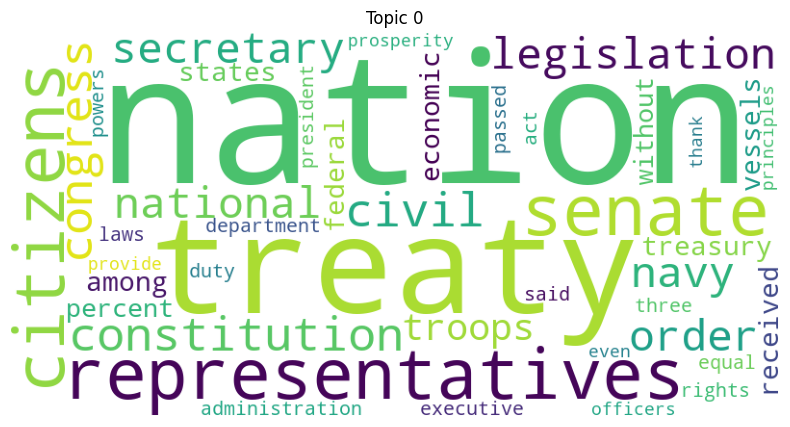

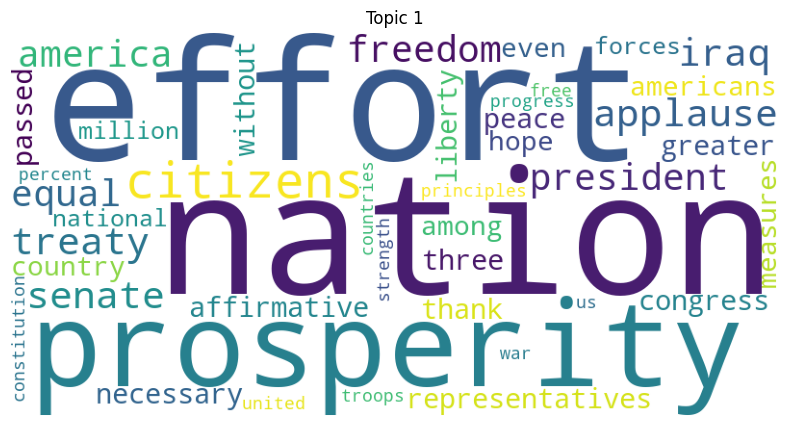

In [42]:
# wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, words in enumerate(topic_words):
    if i == 5: #adjust this number to print more or less wordclouds
        break
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Topic {i}")
    plt.show()

In [46]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Top2Vec model
topic_words, _, _ = top2vec_model.get_topics(top2vec_model.get_num_topics())

# Gensim dictionary from the topic words
dictionary = Dictionary(topic_words)

# Gensim corpus from the topic words
corpus = [dictionary.doc2bow(words) for words in topic_words]

# CoherenceModel
coherence_model = CoherenceModel(topics=topic_words, texts=topic_words, dictionary=dictionary, coherence='c_v')

# Get the coherence score
coherence = coherence_model.get_coherence()
print(coherence)

0.7182226168854704
